<a href="https://colab.research.google.com/github/proteus21/DATA-SCIENCE-STUDY/blob/main/Machine%20Learning/02_regression/05_polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##To install scikit-learn library use command below

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:

**!pip install scikit-learn**

In order to update to newest scikit-learn library, use command below

Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:

**!pip install --upgrade scikit-learn**

### Contenst:
1. [Import library](#0)
2. [Polynomial regression](#1)
3. [Generate data](#2)
4. [Linear model](#3)
5. [Polinomial feature extraction - level 2](#4)
6. [Fitting model](#5)
7. [Polinomial feature extraction - level 3 ](#6)
8. [Fitting model](#7)
9. [Compare metrics](#8)
)

### Spis treści:
1. [Import bibliotek](#0)
2. [Polynomial Regression - Regresja Wielomianowa](#1)
3. [Wygenerowanie danych](#2)
4. [Model liniowy](#3)
5. [Ekstrakcja cech wielomianowych - stopień 2](#4)
6. [Dopasowanie modelu](#5)
7. [Ekstrakcja cech wielomianowych - stopień 3](#6)
8. [Dopasowanie modelu](#7)
9. [Porównanie metryk](#8)



### <a name='0'></a> Import bibliotek / Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True)
sns.set(font_scale=1.3)
sklearn.__version__

'1.0.2'

### <a name='1'></a> Polynomial Regression - Regresja Wielomianowa
Powszechnym wzorcem stosowanym w uczeniu maszynowym jest użycie modeli liniowych wytrenowanych na nieliniowych funkcjach danych.

 Podejscie to utrzymuje szybkie działanie metod liniowych i zarazem umożliwia stosowanie metod liniowych dla znacznie szerszego zakresu danych.

Przykładowo, prosta regresja liniowa może zostać zastosowana przez skonstruowanie cech wielomianowych do modelów nieliniowych.

To implikuje fakt, iż nasz model regresji wielomianowej znajduje się w klasie modeli liniowych i może być rozwiązany za pomocą tych samych technik. 

### Rozważmy model regresji liniowej: $Y=w_0+w_1X_1$

A common pattern used in machine learning is the use of linear models trained on nonlinear data functions.
This approach maintains the rapid operation of linear methods and at the same time allows the use of linear methods for a much wider range of data.
For example, simple linear regression can be applied by constructing polynomial features to nonlinear models.
This implies that our polynomial regression model is in the class of linear models and can be solved using the same techniques.

### Consider the linear regression model: $Y=w_0+w_1X_1$


### <a name='2'></a> Wygenerowanie danych /Generate data

In [5]:
X=np.arange(-10,10,0.5)
noise=80*np.random.randn(40)
y = -X**3 + 10*X**2 - 2*X + 3 + noise
X = X.reshape(40, 1)


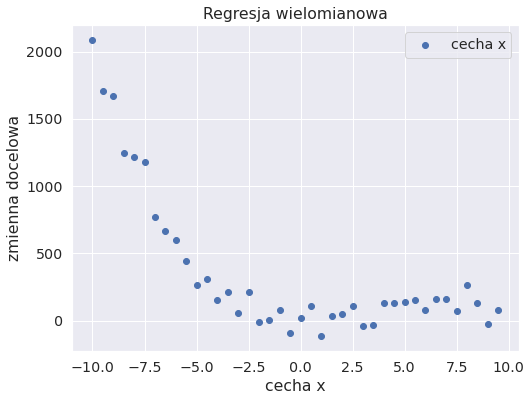

In [6]:
plt.figure(figsize=(8,6))
plt.title("Regresja wielomianowa")
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X,y, label='cecha x')
plt.legend()
plt.show()

### <a name='3'></a> Model liniowy /linear model

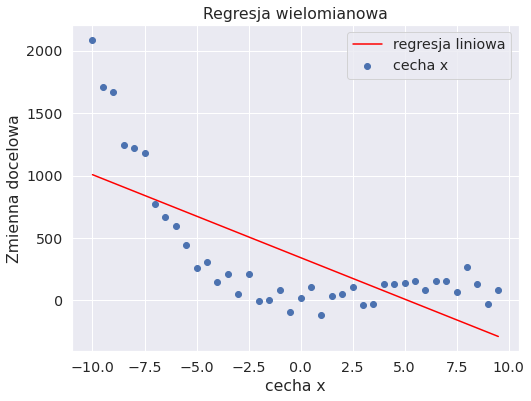

In [7]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X,y)
y_pred_lin=regressor.predict(X)

plt.figure(figsize=(8,6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('Zmienna docelowa')
plt.scatter(X,y,label='cecha x')
plt.plot(X,y_pred_lin, c='red', label="regresja liniowa")
plt.legend()
plt.show()

In [8]:
from sklearn.metrics import r2_score
r2_score(y, y_pred_lin)

0.51234940886126

Model jest niedouczony (underfitting). Potrzebujemy zwiekszyć złozoność modelu dla naszego problemu.

Rozważmy model regresji liniowej:
$$Y = w_0 + w_1 X_1$$
Dodając cechy wielomianowe otrzymujemy:
$$Y = w_0 + w_1 X_1 +w_2X_1^2 $$
Wyobraźmy sobie teraz nastepujące podstawienie:
$$Z = [1, X_1, X_1^2]$$
Wrzucając to z powrotem do naszego modelu otrzymujemy prosty model liniowy:
$$Y = w_0 + w_1 Z_1 + w_2 Z_2$$

Model is underfitting. We need increase complexity model for our problem
Consider linear regression model
$$Y = w_0 + w_1 X_1$$
Adding polynomial feature we get
$$Y = w_0 + w_1 X_1 +w_2X_1^2 $$
Now imagine the following substitution:
$$Z = [1, X_1, X_1^2]$$
Throwing this back into our model, we get a simple linear model:
$$Y = w_0 + w_1 Z_1 + w_2 Z_2$$

### <a name='4'></a> Ekstrakcja cech wielomianowych - stopień 2 / Polinomial feature extraction -grade 2

In [10]:
df = pd.DataFrame(data={'X': X.ravel()})
df.head()
# Funkcja ravel przyporzadkowuje indeksy do numeru wartosci w dataframe, 

,X
0,-10.0
1,-9.5
2,-9.0
3,-8.5
4,-8.0


In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X)
X_poly


array([[  1.  , -10.  , 100.  ],
       [  1.  ,  -9.5 ,  90.25],
       [  1.  ,  -9.  ,  81.  ],
       [  1.  ,  -8.5 ,  72.25],
       [  1.  ,  -8.  ,  64.  ],
       [  1.  ,  -7.5 ,  56.25],
       [  1.  ,  -7.  ,  49.  ],
       [  1.  ,  -6.5 ,  42.25],
       [  1.  ,  -6.  ,  36.  ],
       [  1.  ,  -5.5 ,  30.25],
       [  1.  ,  -5.  ,  25.  ],
       [  1.  ,  -4.5 ,  20.25],
       [  1.  ,  -4.  ,  16.  ],
       [  1.  ,  -3.5 ,  12.25],
       [  1.  ,  -3.  ,   9.  ],
       [  1.  ,  -2.5 ,   6.25],
       [  1.  ,  -2.  ,   4.  ],
       [  1.  ,  -1.5 ,   2.25],
       [  1.  ,  -1.  ,   1.  ],
       [  1.  ,  -0.5 ,   0.25],
       [  1.  ,   0.  ,   0.  ],
       [  1.  ,   0.5 ,   0.25],
       [  1.  ,   1.  ,   1.  ],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.5 ,   6.25],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.5 ,  12.25],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.5 ,  20.25],
       [  

In [14]:
X_poly.shape

(40, 3)

In [15]:
df=pd.DataFrame(X_poly)
df.columns=['1','x','x^2']
df.head(10)

,1,x,x^2
0,1.0,-10.0,100.00
1,1.0,-9.5,90.25
2,1.0,-9.0,81.00
3,1.0,-8.5,72.25
4,1.0,-8.0,64.00
5,1.0,-7.5,56.25
6,1.0,-7.0,49.00
7,1.0,-6.5,42.25
8,1.0,-6.0,36.00
9,1.0,-5.5,30.25


### <a name='5'></a> Dopasowanie modelu /Fitting model

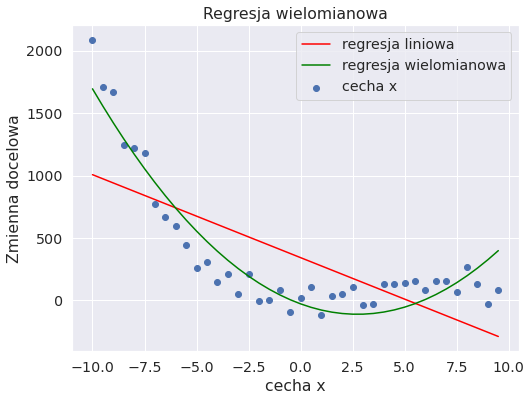

In [16]:
regressor_poly=LinearRegression()
regressor_poly.fit(X_poly, y)
y_pred_2=regressor_poly.predict(X_poly)

plt.figure(figsize=(8,6))
plt.title('Regresja wielomianowa')
plt.xlabel("cecha x")
plt.ylabel('Zmienna docelowa')
plt.scatter(X,y, label='cecha x')
plt.plot(X,y_pred_lin, label='regresja liniowa', c='red')
plt.plot(X,y_pred_2, label='regresja wielomianowa', c='green')
plt.legend()
plt.show()

In [17]:
r2_score(y,y_pred_2)

0.894837546052117

### <a name='54'></a> Ekstrakcja cech wielomianowych - stopień 3 / Polinomial feature extraction -grade 3

In [18]:
poly=PolynomialFeatures(degree=3)
X_poly_3=poly.fit_transform(X)
X_poly_3

array([[    1.   ,   -10.   ,   100.   , -1000.   ],
       [    1.   ,    -9.5  ,    90.25 ,  -857.375],
       [    1.   ,    -9.   ,    81.   ,  -729.   ],
       [    1.   ,    -8.5  ,    72.25 ,  -614.125],
       [    1.   ,    -8.   ,    64.   ,  -512.   ],
       [    1.   ,    -7.5  ,    56.25 ,  -421.875],
       [    1.   ,    -7.   ,    49.   ,  -343.   ],
       [    1.   ,    -6.5  ,    42.25 ,  -274.625],
       [    1.   ,    -6.   ,    36.   ,  -216.   ],
       [    1.   ,    -5.5  ,    30.25 ,  -166.375],
       [    1.   ,    -5.   ,    25.   ,  -125.   ],
       [    1.   ,    -4.5  ,    20.25 ,   -91.125],
       [    1.   ,    -4.   ,    16.   ,   -64.   ],
       [    1.   ,    -3.5  ,    12.25 ,   -42.875],
       [    1.   ,    -3.   ,     9.   ,   -27.   ],
       [    1.   ,    -2.5  ,     6.25 ,   -15.625],
       [    1.   ,    -2.   ,     4.   ,    -8.   ],
       [    1.   ,    -1.5  ,     2.25 ,    -3.375],
       [    1.   ,    -1.   ,     1.   ,    -1

### <a name='7'></a> Dopasowanie modelu /Fitting model

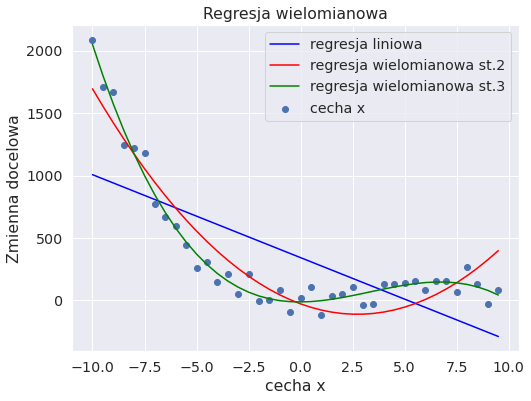

In [21]:
regressor_poly_3=LinearRegression()
regressor_poly_3.fit(X_poly_3, y)
y_pred_3=regressor_poly_3.predict(X_poly_3)

plt.figure(figsize=(8,6))
plt.title('Regresja wielomianowa')
plt.xlabel("cecha x")
plt.ylabel('Zmienna docelowa')
plt.scatter(X,y, label='cecha x')

plt.plot(X,y_pred_lin, label='regresja liniowa', c='blue')
plt.plot(X,y_pred_2, label='regresja wielomianowa st.2', c='red')
plt.plot(X,y_pred_3, label='regresja wielomianowa st.3', c='green')
plt.legend()
plt.show()

In [22]:
r2_score(y,y_pred_3)

0.9797148710728014

In [23]:
r2_score(y,y_pred_lin)

0.51234940886126

### <a name='8'></a> Porównanie metryk /Compare metrics

In [26]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [27]:
results=pd.DataFrame(data={
   'name':['regresja liniowa','regresja wielomianowa st.2','regresja wielomianowa st.3'],
   'r2_score':[r2_score(y,y_pred_lin), r2_score(y, y_pred_2),r2_score(y, y_pred_3) ],
   'mae':[mae(y,y_pred_lin),mae(y,y_pred_2),mae(y,y_pred_3)],
     'mse':[mse(y,y_pred_lin),mse(y,y_pred_2),mse(y,y_pred_3)],
     'rmse':[np.sqrt(mse(y,y_pred_lin)),np.sqrt(mse(y,y_pred_2)),np.sqrt(mse(y,y_pred_3))]

})
results

,name,r2_score,mae,mse,rmse
0,regresja liniowa,0.512349,315.007524,140019.551346,374.191864
1,regresja wielomianowa st.2,0.894838,149.393843,30195.389666,173.768207
2,regresja wielomianowa st.3,0.979715,63.456167,5824.487252,76.318328


In [28]:
px.bar(results, x='name', y='r2_score', width=700, height=400, title='Regresja wielomianowa st.2')

In [30]:
px.bar(results, x='name', y='mae',width=700, height=400, title ='MAE ERROR' )

In [31]:
px.bar(results, x='name', y='mse', width=700, height=400, title='Regresja wielomianowa - mean square error')

In [32]:
px.bar(results, x='name', y='rmse', width=700, title='Regresja wielomianowa - root mean squared error')